In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Version Used for the Library are 

In [2]:
print("Pandas Version : {}".format(pd.__version__))
print("Numpy  Version : {}".format(np.__version__))
print("Seaborn Version : {}".format(sns.__version__))
print("Matplotlib Version : {}".format(matplotlib.__version__))
print("StatModel Version : {}".format(sm.__version__))

Pandas Version : 1.3.4
Numpy  Version : 1.20.3
Seaborn Version : 0.11.2
Matplotlib Version : 3.4.3
StatModel Version : 0.12.2


In [3]:
!ls

BikeSharing_Assignment_Draft_v1       day.csv
BikeSharing_Assignment_Draft_v1.ipynb


In [4]:
# Import the Data to the DataFrame using Pandas

bike_sharing_df = pd.read_csv('day.csv')

In [5]:
# View the Sample data 
bike_sharing_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
514,515,30-05-2019,2,1,5,0,3,1,2,26.923347,30.55645,67.0000,9.000043,745,6110,6855
503,504,19-05-2019,2,1,5,0,6,0,1,24.600000,28.34540,45.6250,5.626325,3410,4884,8294
645,646,08-10-2019,4,1,10,1,1,0,2,15.716653,19.38040,70.9583,12.708493,874,4604,5478
49,50,19-02-2018,1,0,2,0,6,0,1,16.365847,19.57020,18.7917,34.000021,532,1103,1635
573,574,28-07-2019,3,1,7,0,6,0,1,30.989153,34.88020,61.3333,10.542450,2234,4451,6685


In [6]:
# We can find that most of them are Numerical columns except the "dteday"

bike_sharing_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#Check Nullvalues in Column wise 
bike_sharing_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Row wise also not having any null value 
bike_sharing_df.isnull().sum(axis=1).value_counts()

0    730
dtype: int64

In [9]:
# Check the size of the data frame 
bike_sharing_df.shape


(730, 16)

In [10]:
# Check if any duplicates 
bike_sharing_df.duplicated().sum()

0

In [11]:
bike_sharing_df[bike_sharing_df.duplicated()]
# no duplicate record so nothing to worry 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


# Check the Colums name 
### Below are for reference 
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [12]:
bike_sharing_df.columns.to_list()

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

## Data Visualization - Numerical

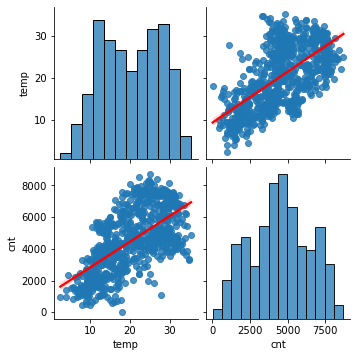

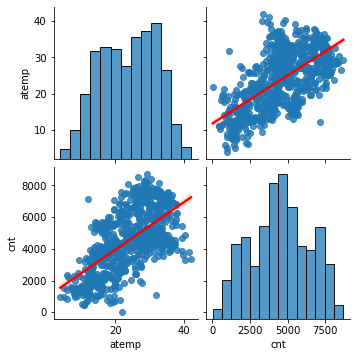

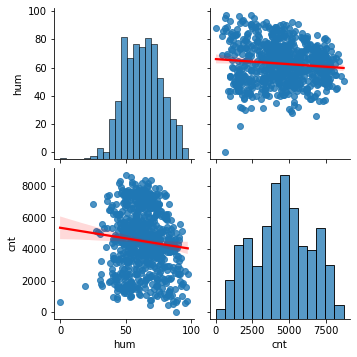

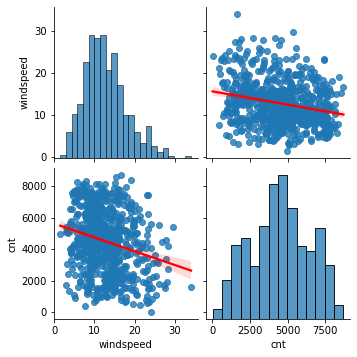

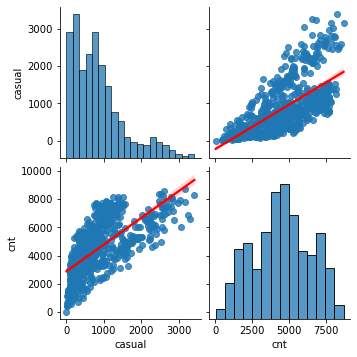

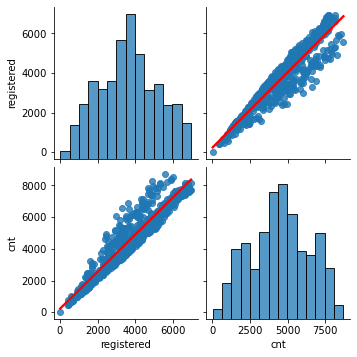

In [13]:
#plt.figure(figsize = (20, 20))
#sns.pairplot(bike_sharing_df[["temp","atemp","hum","windspeed","casual","registered","cnt"]])
#plt.show()

## I could have used the above to pair plot however it is going above 1 GB and not able to view in the github .hence done parwise
columns = ["temp","atemp","hum","windspeed","casual","registered"]

for column in columns:
    sns.pairplot(bike_sharing_df[[column,"cnt"]],kind="reg", plot_kws={'line_kws':{'color':'red'}})
                
# We can see the high correlation against 
#   temp ==> atemp 
#   regisstered ==> cnt ( as expected )
#   casual ==> cnt ( as expected )
#   temp ==> cnt

<Figure size 2160x2160 with 0 Axes>

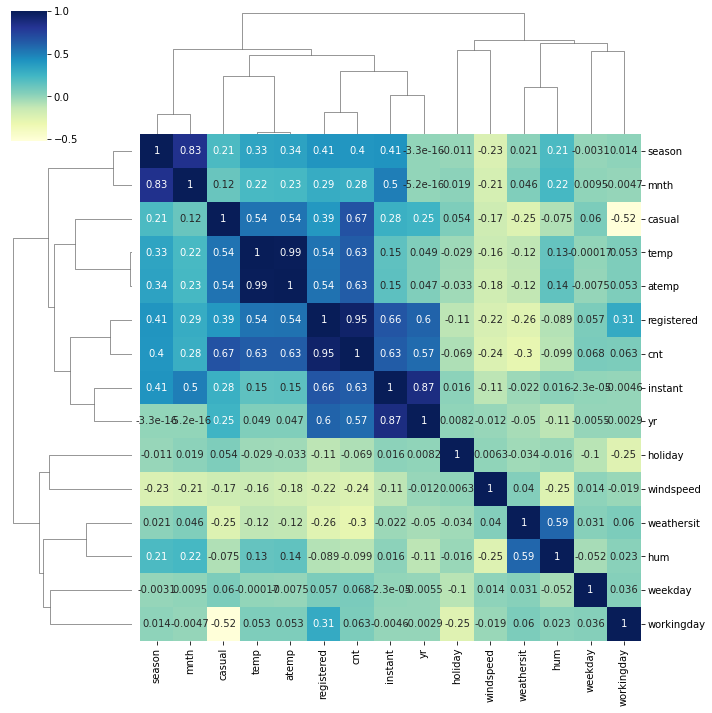

In [14]:
# i used clustermap rather than heat map so that owe can see the correlated one clealy 
# temp and count is crrelated around 0.63 
# Weathersit and hum correlated around 0.59 
# Season and month around - 0.83 
# We ignored the correlation with instant/registered as it will come par tof the cnt correlation 
plt.figure(figsize = (30, 30))
sns.clustermap(bike_sharing_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Data Visualization - Categorical

In [15]:
interested_columns  = [ 'windspeed', 'hum' ,'temp' , 'atemp' ,'casual' , 'registered' , 'cnt']
describe_df = bike_sharing_df[interested_columns].describe().T
describe_df['IQR'] = describe_df['75%'] - describe_df['25%']

for col in describe_df.index:
    W1 = bike_sharing_df[col].quantile(.25) - 1.5 * describe_df.loc[col,'IQR']
    W2 = bike_sharing_df[col].quantile(.75) + 1.5 * describe_df.loc[col,'IQR']
    describe_df.loc[col,'Whisker1'] = W1
    describe_df.loc[col,'Whisker2'] = W2
    filt = (bike_sharing_df[col] < W1 ) | (bike_sharing_df[col] > W2)
    describe_df.loc[col,'max_outliers_value'] = round(bike_sharing_df[filt][col].max(),2)
    describe_df.loc[col,'min_outliers_value'] = round(bike_sharing_df[filt][col].min(),2)
    describe_df.loc[col,'no_of_outliers'] = len(bike_sharing_df[filt][col])
describe_df['no_of_outliers'] = describe_df['no_of_outliers'].astype('int')
describe_df.sort_values('no_of_outliers',ascending=False)['no_of_outliers']

casual        44
windspeed     13
hum            2
temp           0
atemp          0
registered     0
cnt            0
Name: no_of_outliers, dtype: int64

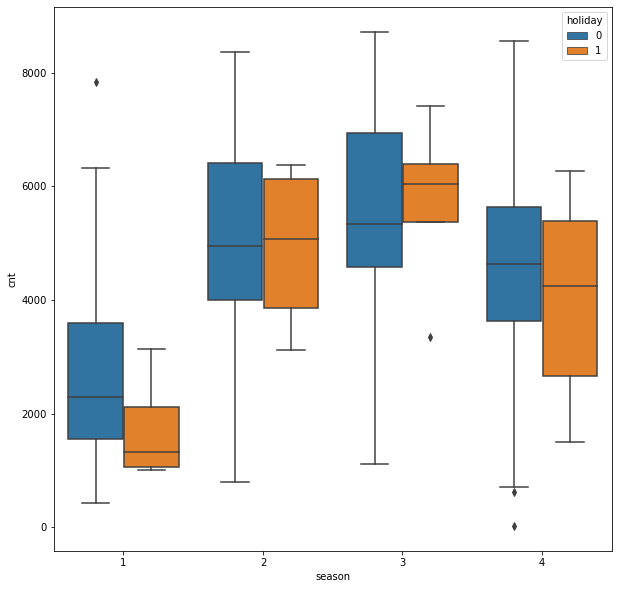

In [16]:
plt.figure(figsize=(10, 10))
sns.boxplot(x = 'season' , y = 'cnt', hue='holiday' , data = bike_sharing_df,)
plt.show()

# Checked if any change depending on the Holiday and you can see it doesn;t for the season 2 "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"

1. Median of bike rental count is highest for fall and summer  season. . There is an outlier for season 1 as well 
3. Highest bike rental is for year 2019 as you can see from media and the Max. 
4. Highest bike rental count is for month 9 i.e. September.
5. July seems to be the Highest mean for the bike rent , however max seems to be in september and least seems to be october 
7. Highest bike rental count is for no holiday days marked with 0.
8. All days more or less has the same Bike rental pattern i.e the median 
9.Bike rental median is highest for weathersit 1(Clear, Few clouds, Partly cloudy, Partly cloudy) and the  lowest is for weathersit 3(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog).
10. Checked if any change depending on the Holiday and you can see it doesn;t for the season 2 "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"

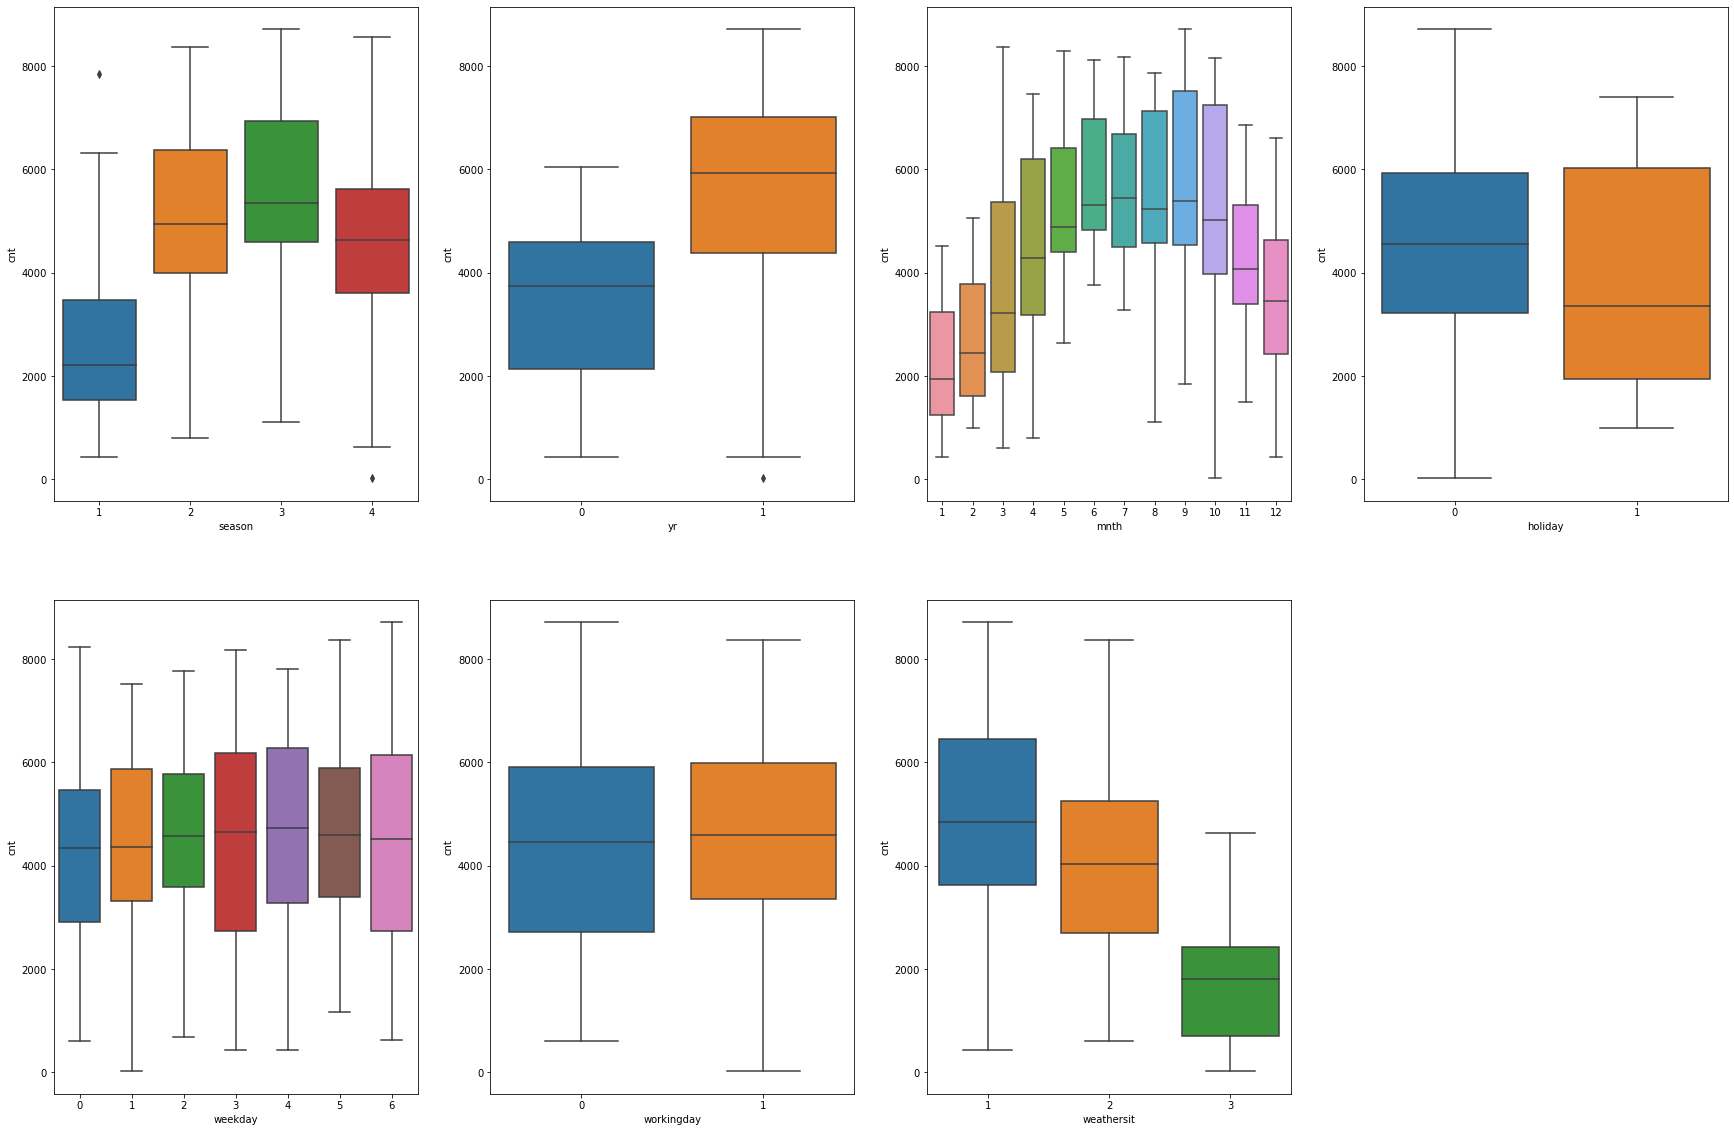

In [17]:
plt.figure(figsize=(30, 20))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing_df)
plt.show()

##  Data Cleansing 

In [18]:
#As a base line just assume all object are categorical . This assumption can be wrong as well but we get some idea. Excample Issue_yr maybe numerical however it can be categorical 
categorical  = []
quantitative = []
for col in bike_sharing_df.columns:
    if bike_sharing_df[col].dtypes == 'object':
        categorical.append(col)
    else:
        quantitative.append(col)
print("Categorical Variable are :\n {}\n".format(','.join(categorical)))
print("Quantitative  Varable  are :\n {}\n".format(','.join(quantitative)))

Categorical Variable are :
 dteday

Quantitative  Varable  are :
 instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt



In [19]:
data ={}
for column in quantitative:
    #print(column)
    unique_values = bike_sharing_df[column].unique().tolist()
    number_unique_values = len(unique_values)
    data[column] = {'cnt_unique_value' : number_unique_values , 'unique_values' : ';'.join(str(v) for v in unique_values), }

    if number_unique_values < 20:   
        #print("Unique Value for the Column {} : {} : Not Exapanding as the length is more than 10 ".format(column,number_unique_values))
        print("Unique Value for the Column {} : {} : {}".format(column,number_unique_values,unique_values))
    #else:
    #    print("Unique Value for the Column {} : {} : {}".format(column,number_unique_values,unique_values))
        



Unique Value for the Column season : 4 : [1, 2, 3, 4]
Unique Value for the Column yr : 2 : [0, 1]
Unique Value for the Column mnth : 12 : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Unique Value for the Column holiday : 2 : [0, 1]
Unique Value for the Column weekday : 7 : [6, 0, 1, 2, 3, 4, 5]
Unique Value for the Column workingday : 2 : [0, 1]
Unique Value for the Column weathersit : 3 : [2, 1, 3]


In [20]:
bike_sharing_values = pd.DataFrame.from_dict(data,orient='index')
bike_sharing_values.sort_values(by='cnt_unique_value')
print(bike_sharing_values.loc['holiday'].values)
# You can see that the Unique value on each column in the dataframe if we need to have a summary 
bike_sharing_values.sort_values('cnt_unique_value')

# No Junk value that i can see 


[2 '0;1']


,cnt_unique_value,unique_values
yr,2,0;1
holiday,2,0;1
workingday,2,0;1
weathersit,3,2;1;3
season,4,1;2;3;4
weekday,7,6;0;1;2;3;4;5
mnth,12,1;2;3;4;5;6;7;8;9;10;11;12
temp,498,14.110847;14.902598;8.050924;8.2;9.305237;8.37...
hum,594,80.5833;69.6087;43.7273;59.0435;43.6957;51.826...
casual,605,331;131;120;108;82;88;148;68;54;41;43;25;38;22...


### As we can see we can drop the below Columns 

#### instant : Just the Index no value add 
#### dteday  : Reduntent Column for 'yr' and mnth
      - yr : year (0: 2018, 1:2019)
      - mnth : month ( 1 to 12)
#### casual :  We need to predict the 'cnt' columns and this column is a combination of casual and registered so no value add 
#### registered : We need to predict the 'cnt' columns and this column is a combination of casual and registered so no value add 


In [21]:
bike_sharing_df.shape

(730, 16)

In [22]:
drop_columns = ['instant', 'dteday', 'casual' , 'registered']
bike_sharing_df.drop(columns=drop_columns,inplace=True)

In [23]:
bike_sharing_df.shape

(730, 12)

In [24]:
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Perform One hot Encoding 

##### Perform ONehot encodingon columns 'season','weathersit','mnth','weekday'
    Unique Value for the Column season : 4 : [1, 2, 3, 4]
    Unique Value for the Column mnth : 12 : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    Unique Value for the Column weekday : 7 : [6, 0, 1, 2, 3, 4, 5]
    Unique Value for the Column weathersit : 3 : [2, 1, 3]

##### Note : We ignored the 'yr' / 'holiday' and workingday as it is a binary value already
    Unique Value for the Column yr : 2 : [0, 1]
    Unique Value for the Column holiday : 2 : [0, 1]
    Unique Value for the Column workingday : 2 : [0, 1]


In [25]:
one_hot_encoding_columns = ['season','weathersit','mnth','weekday']
bike_sharing_df= pd.get_dummies(bike_sharing_df,columns=one_hot_encoding_columns,drop_first=True)

In [26]:
print("New Columns are : {}".format(','.join(bike_sharing_df.columns)))

New Columns are : yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6


In [27]:
bike_sharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


In [28]:
bike_sharing_df.shape

(730, 30)

## Split dataset for training and testing

In [29]:
## np.random.seed(0) makes the random numbers predictable
np.random.seed(0)
bike_sharing_df_train, bike_sharing_df_test = train_test_split(bike_sharing_df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [30]:
bike_sharing_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
367,1,0,1,6.150000,6.31375,44.1250,24.499957,2236,0,0,...,0,0,0,0,0,1,0,0,0,0
648,1,0,1,17.835000,21.55835,46.3333,12.166932,7570,0,0,...,0,1,0,0,0,0,0,1,0,0
44,0,0,1,17.015000,19.91750,37.5833,27.999836,1913,0,0,...,0,0,0,0,1,0,0,0,0,0
705,1,0,1,13.154153,16.09790,76.4167,8.750200,5008,0,0,...,0,0,0,1,0,0,0,0,1,0
379,1,0,0,6.833347,8.08125,41.9167,16.834286,2311,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Decided to go with MinMaxScaler than the Stanrdscalar
scaler = MinMaxScaler()

num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]

bike_sharing_df_train[num_vars] = scaler.fit_transform(bike_sharing_df_train[num_vars])

In [32]:
bike_sharing_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
367,1,0,1,0.113228,0.061963,0.454701,0.695175,0.254717,0,0,...,0,0,0,0,0,1,0,0,0,0
648,1,0,1,0.468352,0.462175,0.477458,0.299450,0.868385,0,0,...,0,1,0,0,0,0,0,1,0,0
44,0,0,1,0.443431,0.419099,0.387290,0.807474,0.217556,0,0,...,0,0,0,0,1,0,0,0,0,0
705,1,0,1,0.326094,0.318824,0.787463,0.189819,0.573631,0,0,...,0,0,0,1,0,0,0,0,1,0
379,1,0,0,0.133996,0.108365,0.431945,0.449210,0.263346,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#Since we USED MINMAX YOU CAN SEE THE MIN AND MAX ARE 0 AND 1 

bike_sharing_df_train.describe().T


,count,mean,std,min,25%,50%,75%,max
yr,584.0,0.513699,0.500241,0.0,0.000000,1.000000,1.000000,1.0
holiday,584.0,0.027397,0.163378,0.0,0.000000,0.000000,0.000000,1.0
workingday,584.0,0.667808,0.471403,0.0,0.000000,1.000000,1.000000,1.0
temp,584.0,0.537414,0.225336,0.0,0.340113,0.545191,0.736512,1.0
atemp,584.0,0.513175,0.211663,0.0,0.331819,0.530558,0.690521,1.0
hum,584.0,0.649499,0.144219,0.0,0.535852,0.653714,0.752361,1.0
windspeed,584.0,0.319463,0.168114,0.0,0.199177,0.294764,0.410413,1.0
cnt,584.0,0.515792,0.225336,0.0,0.350696,0.522837,0.691872,1.0
season_2,584.0,0.246575,0.431387,0.0,0.000000,0.000000,0.000000,1.0
season_3,584.0,0.251712,0.434369,0.0,0.000000,0.000000,1.000000,1.0


In [34]:
y_train = bike_sharing_df_train.pop('cnt')
X_train = bike_sharing_df_train

In [35]:
print(y_train.shape)
print(X_train.shape)

(584,)
(584, 29)


In [36]:
# Running RFE (RFE (Recursive Feature Elimination) 
# Note this is available only in the sklearn 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15) # running RFE
rfe = rfe.fit(X_train.values, y_train)


In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 2),
 ('season_4', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', False, 3),
 ('mnth_4', False, 6),
 ('mnth_5', False, 4),
 ('mnth_6', False, 5),
 ('mnth_7', False, 8),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 12),
 ('mnth_12', False, 13),
 ('weekday_1', False, 9),
 ('weekday_2', False, 10),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 11),
 ('weekday_6', True, 1)]

In [38]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False,  True])

In [39]:
rfe_selected_columns = bike_sharing_df_train.columns[rfe.support_]
rfe_rejected_columns = bike_sharing_df_train.columns[~rfe.support_]
print("Accepted columns by RFE are : {}".format(';'.join(rfe_selected_columns)))
print('XXXXXXXXXXX')
print("Rjected  columns by RFE are : {}".format(';'.join(rfe_rejected_columns)))

Accepted columns by RFE are : yr;holiday;workingday;temp;atemp;hum;windspeed;season_2;season_4;weathersit_2;weathersit_3;mnth_8;mnth_9;mnth_10;weekday_6
XXXXXXXXXXX
Rjected  columns by RFE are : season_3;mnth_2;mnth_3;mnth_4;mnth_5;mnth_6;mnth_7;mnth_11;mnth_12;weekday_1;weekday_2;weekday_3;weekday_4;weekday_5


### Build Model using StatModel

We will keep the Significance level Alpha  as 0.05 

In [40]:
# Helper function to Calculate the VIFs for the new model
def generate_VIF(col,X_train):
    vif = pd.DataFrame()
    vif['Features'] = col
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    display(vif)

In [41]:
def train_model(X_train):
    # Add a constant for the statmodel  
    X_train_sm = sm.add_constant(X_train)
    #display(X_train_sm)
    # Using statmodel train it for the Ordinary Least Squares (OLS)
    lm = sm.OLS(y_train,X_train_sm).fit() 
    # Review the coefficient or parameters 
    display(pd.DataFrame(lm.params,columns=['coeff']))
    display(lm.summary())
    generate_VIF(X_train.columns.to_list(),X_train_sm)
    return (lm,X_train_sm)

In [42]:
# Just select the column that is suggested by RFE 
# Filter the Xtrain using the rfe_selected_columns 

X_train_sm_itr = X_train[rfe_selected_columns]
X_train_sm = X_train_sm_itr.copy()

In [43]:
X_train_sm_itr.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_4,weathersit_2,weathersit_3,mnth_8,mnth_9,mnth_10,weekday_6
367,1,0,1,0.113228,0.061963,0.454701,0.695175,0,0,0,0,0,0,0,0
648,1,0,1,0.468352,0.462175,0.477458,0.299450,0,1,0,0,0,0,1,0
44,0,0,1,0.443431,0.419099,0.387290,0.807474,0,0,0,0,0,0,0,0
705,1,0,1,0.326094,0.318824,0.787463,0.189819,0,1,1,0,0,0,0,0
379,1,0,0,0.133996,0.108365,0.431945,0.449210,0,0,0,0,0,0,0,0


In [44]:
lm = train_model(X_train_sm_itr)

,coeff
const,0.181482
yr,0.225596
holiday,-0.057082
workingday,0.050943
temp,0.523505
atemp,0.021912
hum,-0.169469
windspeed,-0.184887
season_2,0.107591
season_4,0.134744


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     220.0
Date:                Wed, 30 Nov 2022   Prob (F-statistic):          4.28e-225
Time:                        17:25:23   Log-Likelihood:                 602.31
No. Observations:                 584   AIC:                            -1173.
Df Residuals:                     568   BIC:                            -1103.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1815      0.027      6.834      0.000       0.129       0.234
yr               0.2256      0.007     30.720      0.000       0.211       0.240
holiday         -0.0571      0.024     -2.390      0.017      -0.104      -0.010
workingday       0.0509      0.010      4.957      0.000       0.031       0.071
temp             0.5235      0.124      4.206      0.000       0.279       0.768
atemp            0.0219      0.132      0.166      0.868      -0.237       0.281
hum             -0.1695      0.035     -4.871      0.000      -0.238      -0.101
windspeed       -0.1849      0.024     -7.740      0.000      -0.232      -0.138
season_2         0.1076      0.010     10.754      0.000       0.088       0.127
season_4         0.1347      0.011     12.142      0.000       0.113       0.157
weathersit_2    -0.0565      0.010     -5.856      0.000      -0.075      -0.038
weathersit_3    -0.2524      0.025    -10.150      0.000      -0.301      -0.204
mnth_8           0.0562      0.015      3.678      0.000       0.026       0.086
mnth_9           0.1209      0.015      8.128      0.000       0.092       0.150
mnth_10          0.0502      0.016      3.226      0.001       0.020       0.081
weekday_6        0.0603      0.013      4.578      0.000       0.034       0.086
==============================================================================
Omnibus:                       87.794   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.020
Skew:                          -0.772   Prob(JB):                     3.73e-49
Kurtosis:                       5.605   Cond. No.                         89.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
4,atemp,407.17
3,temp,401.33
5,hum,16.83
2,workingday,4.84
6,windspeed,3.99
8,season_4,2.34
9,weathersit_2,2.15
0,yr,2.03
7,season_2,1.88
14,weekday_6,1.85


In [45]:
X_train_sm_itr.drop(columns='atemp',inplace=True)
display(X_train_sm_itr)
lm = train_model(X_train_sm_itr)

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_4,weathersit_2,weathersit_3,mnth_8,mnth_9,mnth_10,weekday_6
367,1,0,1,0.113228,0.454701,0.695175,0,0,0,0,0,0,0,0
648,1,0,1,0.468352,0.477458,0.299450,0,1,0,0,0,0,1,0
44,0,0,1,0.443431,0.387290,0.807474,0,0,0,0,0,0,0,0
705,1,0,1,0.326094,0.787463,0.189819,0,1,1,0,0,0,0,0
379,1,0,0,0.133996,0.431945,0.449210,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,1,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,1,1,0,0,0,0,1
79,0,0,1,0.462664,0.759870,0.529881,1,0,1,0,0,0,0,0


,coeff
const,0.181728
yr,0.225574
holiday,-0.057240
workingday,0.050947
temp,0.543922
hum,-0.169074
windspeed,-0.185640
season_2,0.107748
season_4,0.134923
weathersit_2,-0.056524


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     236.2
Date:                Wed, 30 Nov 2022   Prob (F-statistic):          2.77e-226
Time:                        17:25:23   Log-Likelihood:                 602.30
No. Observations:                 584   AIC:                            -1175.
Df Residuals:                     569   BIC:                            -1109.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1817      0.026      6.859      0.000       0.130       0.234
yr               0.2256      0.007     30.749      0.000       0.211       0.240
holiday         -0.0572      0.024     -2.400      0.017      -0.104      -0.010
workingday       0.0509      0.010      4.961      0.000       0.031       0.071
temp             0.5439      0.020     26.868      0.000       0.504       0.584
hum             -0.1691      0.035     -4.875      0.000      -0.237      -0.101
windspeed       -0.1856      0.023     -7.922      0.000      -0.232      -0.140
season_2         0.1077      0.010     10.828      0.000       0.088       0.127
season_4         0.1349      0.011     12.226      0.000       0.113       0.157
weathersit_2    -0.0565      0.010     -5.871      0.000      -0.075      -0.038
weathersit_3    -0.2528      0.025    -10.217      0.000      -0.301      -0.204
mnth_8           0.0558      0.015      3.692      0.000       0.026       0.086
mnth_9           0.1208      0.015      8.133      0.000       0.092       0.150
mnth_10          0.0502      0.016      3.233      0.001       0.020       0.081
weekday_6        0.0603      0.013      4.582      0.000       0.034       0.086
==============================================================================
Omnibus:                       87.568   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.454
Skew:                          -0.770   Prob(JB):                     4.95e-49
Kurtosis:                       5.602   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
4,hum,16.33
3,temp,10.07
2,workingday,4.84
5,windspeed,3.85
7,season_4,2.31
8,weathersit_2,2.14
0,yr,2.03
6,season_2,1.86
13,weekday_6,1.85
12,mnth_10,1.69


In [46]:
X_train_sm_itr.drop(columns='hum',inplace=True)
display(X_train_sm_itr)
lm = train_model(X_train_sm_itr)

,yr,holiday,workingday,temp,windspeed,season_2,season_4,weathersit_2,weathersit_3,mnth_8,mnth_9,mnth_10,weekday_6
367,1,0,1,0.113228,0.695175,0,0,0,0,0,0,0,0
648,1,0,1,0.468352,0.299450,0,1,0,0,0,0,1,0
44,0,0,1,0.443431,0.807474,0,0,0,0,0,0,0,0
705,1,0,1,0.326094,0.189819,0,1,1,0,0,0,0,0
379,1,0,0,0.133996,0.449210,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.187140,0,0,0,0,1,0,0,0
53,0,0,1,0.202618,0.111379,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.431816,0,1,1,0,0,0,0,1
79,0,0,1,0.462664,0.529881,1,0,1,0,0,0,0,0


,coeff
const,0.081774
yr,0.230143
holiday,-0.055650
workingday,0.052929
temp,0.524959
windspeed,-0.153569
season_2,0.105279
season_4,0.127215
weathersit_2,-0.083833
weathersit_3,-0.299863


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     242.8
Date:                Wed, 30 Nov 2022   Prob (F-statistic):          1.90e-222
Time:                        17:25:23   Log-Likelihood:                 590.35
No. Observations:                 584   AIC:                            -1153.
Df Residuals:                     570   BIC:                            -1092.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0818      0.017      4.779      0.000       0.048       0.115
yr               0.2301      0.007     31.017      0.000       0.216       0.245
holiday         -0.0556      0.024     -2.289      0.022      -0.103      -0.008
workingday       0.0529      0.010      5.058      0.000       0.032       0.073
temp             0.5250      0.020     25.911      0.000       0.485       0.565
windspeed       -0.1536      0.023     -6.696      0.000      -0.199      -0.109
season_2         0.1053      0.010     10.388      0.000       0.085       0.125
season_4         0.1272      0.011     11.421      0.000       0.105       0.149
weathersit_2    -0.0838      0.008    -10.497      0.000      -0.100      -0.068
weathersit_3    -0.2999      0.023    -12.909      0.000      -0.345      -0.254
mnth_8           0.0536      0.015      3.475      0.001       0.023       0.084
mnth_9           0.1140      0.015      7.557      0.000       0.084       0.144
mnth_10          0.0478      0.016      3.018      0.003       0.017       0.079
weekday_6        0.0639      0.013      4.764      0.000       0.038       0.090
==============================================================================
Omnibus:                       83.969   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.680
Skew:                          -0.741   Prob(JB):                     6.56e-47
Kurtosis:                       5.559   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
3,temp,6.42
2,workingday,4.27
4,windspeed,3.58
6,season_4,2.06
0,yr,2.03
5,season_2,1.86
12,weekday_6,1.74
11,mnth_10,1.68
9,mnth_8,1.57
7,weathersit_2,1.54


In [47]:
X_train_sm_itr.drop(columns='workingday',inplace=True)
display(X_train_sm_itr)
lm = train_model(X_train_sm_itr)

,yr,holiday,temp,windspeed,season_2,season_4,weathersit_2,weathersit_3,mnth_8,mnth_9,mnth_10,weekday_6
367,1,0,0.113228,0.695175,0,0,0,0,0,0,0,0
648,1,0,0.468352,0.299450,0,1,0,0,0,0,1,0
44,0,0,0.443431,0.807474,0,0,0,0,0,0,0,0
705,1,0,0.326094,0.189819,0,1,1,0,0,0,0,0
379,1,0,0.133996,0.449210,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.187140,0,0,0,0,1,0,0,0
53,0,0,0.202618,0.111379,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.431816,0,1,1,0,0,0,0,1
79,0,0,0.462664,0.529881,1,0,1,0,0,0,0,0


,coeff
const,0.121029
yr,0.230791
holiday,-0.098001
temp,0.527754
windspeed,-0.151593
season_2,0.105689
season_4,0.127698
weathersit_2,-0.081406
weathersit_3,-0.293745
mnth_8,0.054724


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     250.1
Date:                Wed, 30 Nov 2022   Prob (F-statistic):          3.05e-218
Time:                        17:25:23   Log-Likelihood:                 577.53
No. Observations:                 584   AIC:                            -1129.
Df Residuals:                     571   BIC:                            -1072.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1210      0.016      7.771      0.000       0.090       0.152
yr               0.2308      0.008     30.460      0.000       0.216       0.246
holiday         -0.0980      0.023     -4.203      0.000      -0.144      -0.052
temp             0.5278      0.021     25.516      0.000       0.487       0.568
windspeed       -0.1516      0.023     -6.473      0.000      -0.198      -0.106
season_2         0.1057      0.010     10.211      0.000       0.085       0.126
season_4         0.1277      0.011     11.226      0.000       0.105       0.150
weathersit_2    -0.0814      0.008     -9.999      0.000      -0.097      -0.065
weathersit_3    -0.2937      0.024    -12.399      0.000      -0.340      -0.247
mnth_8           0.0547      0.016      3.477      0.001       0.024       0.086
mnth_9           0.1146      0.015      7.441      0.000       0.084       0.145
mnth_10          0.0466      0.016      2.880      0.004       0.015       0.078
weekday_6        0.0209      0.011      1.970      0.049    6.44e-05       0.042
==============================================================================
Omnibus:                       83.669   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.400
Skew:                          -0.778   Prob(JB):                     1.23e-41
Kurtosis:                       5.307   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
2,temp,5.22
3,windspeed,3.15
0,yr,2.00
5,season_4,2.00
4,season_2,1.86
10,mnth_10,1.67
8,mnth_8,1.57
6,weathersit_2,1.49
9,mnth_9,1.34
11,weekday_6,1.18


In [48]:
X_train_sm_itr.drop(columns='windspeed',inplace=True)
display(X_train_sm_itr)
lm = train_model(X_train_sm_itr)

,yr,holiday,temp,season_2,season_4,weathersit_2,weathersit_3,mnth_8,mnth_9,mnth_10,weekday_6
367,1,0,0.113228,0,0,0,0,0,0,0,0
648,1,0,0.468352,0,1,0,0,0,0,1,0
44,0,0,0.443431,0,0,0,0,0,0,0,0
705,1,0,0.326094,0,1,1,0,0,0,0,0
379,1,0,0.133996,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0,0,0,0,1,0,0,0
53,0,0,0.202618,0,0,0,0,0,0,0,0
350,0,0,0.248216,0,1,1,0,0,0,0,1
79,0,0,0.462664,1,0,1,0,0,0,0,0


,coeff
const,0.059264
yr,0.229851
holiday,-0.102113
temp,0.550781
season_2,0.101564
season_4,0.137538
weathersit_2,-0.079098
weathersit_3,-0.309075
mnth_8,0.056461
mnth_9,0.120300


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     251.1
Date:                Wed, 30 Nov 2022   Prob (F-statistic):          1.06e-210
Time:                        17:25:23   Log-Likelihood:                 556.85
No. Observations:                 584   AIC:                            -1090.
Df Residuals:                     572   BIC:                            -1037.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0593      0.013      4.651      0.000       0.034       0.084
yr               0.2299      0.008     29.312      0.000       0.214       0.245
holiday         -0.1021      0.024     -4.233      0.000      -0.149      -0.055
temp             0.5508      0.021     26.114      0.000       0.509       0.592
season_2         0.1016      0.011      9.498      0.000       0.081       0.123
season_4         0.1375      0.012     11.787      0.000       0.115       0.160
weathersit_2    -0.0791      0.008     -9.395      0.000      -0.096      -0.063
weathersit_3    -0.3091      0.024    -12.667      0.000      -0.357      -0.261
mnth_8           0.0565      0.016      3.466      0.001       0.024       0.088
mnth_9           0.1203      0.016      7.557      0.000       0.089       0.152
mnth_10          0.0430      0.017      2.570      0.010       0.010       0.076
weekday_6        0.0173      0.011      1.579      0.115      -0.004       0.039
==============================================================================
Omnibus:                       86.739   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.520
Skew:                          -0.784   Prob(JB):                     1.43e-45
Kurtosis:                       5.455   Cond. No.                         9.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
2,temp,4.14
4,season_4,1.98
0,yr,1.94
3,season_2,1.85
9,mnth_10,1.67
7,mnth_8,1.55
5,weathersit_2,1.45
8,mnth_9,1.32
10,weekday_6,1.15
6,weathersit_3,1.06


In [49]:
X_train_sm_itr.drop(columns='weekday_6',inplace=True)
display(X_train_sm_itr)
lm = train_model(X_train_sm_itr)

,yr,holiday,temp,season_2,season_4,weathersit_2,weathersit_3,mnth_8,mnth_9,mnth_10
367,1,0,0.113228,0,0,0,0,0,0,0
648,1,0,0.468352,0,1,0,0,0,0,1
44,0,0,0.443431,0,0,0,0,0,0,0
705,1,0,0.326094,0,1,1,0,0,0,0
379,1,0,0.133996,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0,0,0,0,1,0,0
53,0,0,0.202618,0,0,0,0,0,0,0
350,0,0,0.248216,0,1,1,0,0,0,0
79,0,0,0.462664,1,0,1,0,0,0,0


,coeff
const,0.062594
yr,0.229400
holiday,-0.104872
temp,0.550110
season_2,0.101305
season_4,0.137411
weathersit_2,-0.079147
weathersit_3,-0.308630
mnth_8,0.056542
mnth_9,0.120759


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     275.3
Date:                Wed, 30 Nov 2022   Prob (F-statistic):          2.14e-211
Time:                        17:25:23   Log-Likelihood:                 555.58
No. Observations:                 584   AIC:                            -1089.
Df Residuals:                     573   BIC:                            -1041.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0626      0.013      4.975      0.000       0.038       0.087
yr               0.2294      0.008     29.236      0.000       0.214       0.245
holiday         -0.1049      0.024     -4.353      0.000      -0.152      -0.058
temp             0.5501      0.021     26.054      0.000       0.509       0.592
season_2         0.1013      0.011      9.462      0.000       0.080       0.122
season_4         0.1374      0.012     11.761      0.000       0.114       0.160
weathersit_2    -0.0791      0.008     -9.388      0.000      -0.096      -0.063
weathersit_3    -0.3086      0.024    -12.633      0.000      -0.357      -0.261
mnth_8           0.0565      0.016      3.467      0.001       0.025       0.089
mnth_9           0.1208      0.016      7.577      0.000       0.089       0.152
mnth_10          0.0429      0.017      2.564      0.011       0.010       0.076
==============================================================================
Omnibus:                       80.894   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.603
Skew:                          -0.732   Prob(JB):                     5.53e-43
Kurtosis:                       5.420   Cond. No.                         9.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
2,temp,4.03
4,season_4,1.97
0,yr,1.94
3,season_2,1.85
9,mnth_10,1.66
7,mnth_8,1.55
5,weathersit_2,1.45
8,mnth_9,1.32
6,weathersit_3,1.06
1,holiday,1.03


In [50]:
print("Final Model")
print("XXXXXXXXXX")
lm[0].summary()

Final Model
XXXXXXXXXX


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     275.3
Date:                Wed, 30 Nov 2022   Prob (F-statistic):          2.14e-211
Time:                        17:25:23   Log-Likelihood:                 555.58
No. Observations:                 584   AIC:                            -1089.
Df Residuals:                     573   BIC:                            -1041.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0626      0.013      4.975      0.000       0.038       0.087
yr               0.2294      0.008     29.236      0.000       0.214       0.245
holiday         -0.1049      0.024     -4.353      0.000      -0.152      -0.058
temp             0.5501      0.021     26.054      0.000       0.509       0.592
season_2         0.1013      0.011      9.462      0.000       0.080       0.122
season_4         0.1374      0.012     11.761      0.000       0.114       0.160
weathersit_2    -0.0791      0.008     -9.388      0.000      -0.096      -0.063
weathersit_3    -0.3086      0.024    -12.633      0.000      -0.357      -0.261
mnth_8           0.0565      0.016      3.467      0.001       0.025       0.089
mnth_9           0.1208      0.016      7.577      0.000       0.089       0.152
mnth_10          0.0429      0.017      2.564      0.011       0.010       0.076
==============================================================================
Omnibus:                       80.894   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.603
Skew:                          -0.732   Prob(JB):                     5.53e-43
Kurtosis:                       5.420   Cond. No.                         9.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
X_train_sm_itr
X_train_sm_itr = sm.add_constant(lm[1])
#

In [52]:
X_train_sm_itr

,const,yr,holiday,temp,season_2,season_4,weathersit_2,weathersit_3,mnth_8,mnth_9,mnth_10
367,1.0,1,0,0.113228,0,0,0,0,0,0,0
648,1.0,1,0,0.468352,0,1,0,0,0,0,1
44,1.0,0,0,0.443431,0,0,0,0,0,0,0
705,1.0,1,0,0.326094,0,1,1,0,0,0,0
379,1.0,1,0,0.133996,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0,0,0,0,1,0,0
53,1.0,0,0,0.202618,0,0,0,0,0,0,0
350,1.0,0,0,0.248216,0,1,1,0,0,0,0
79,1.0,0,0,0.462664,1,0,1,0,0,0,0


In [53]:
y_train_cnt = lm[0].predict(X_train_sm_itr)

In [54]:
np.sqrt(mean_squared_error(y_train, y_train_cnt))

0.09345431437558166

Text(0.5, 0, 'Errors')

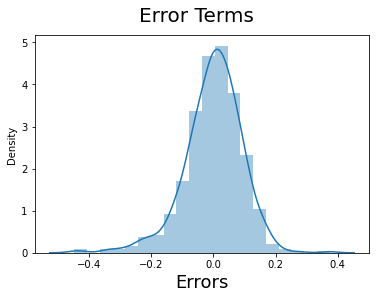

In [55]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

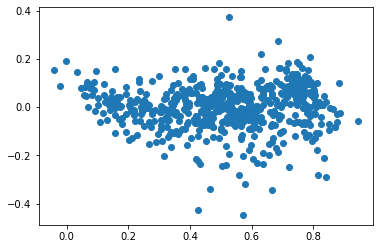

In [56]:
plt.scatter(y_train_cnt,(y_train - y_train_cnt))
plt.show()

In [57]:
num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]
bike_sharing_df_test[num_vars] = scaler.transform(bike_sharing_df_test[num_vars])

In [58]:
bike_sharing_df_test.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,0,0,1,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,1,0,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,0,0,1,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,0,0,1,0,0


In [59]:
bike_sharing_df_test.shape

(146, 30)

In [60]:
y_test = bike_sharing_df_test.pop('cnt')
X_test = bike_sharing_df_test

In [61]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [62]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,1,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,1,0,0,...,0,0,0,0,0,0,1,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,0,1,0,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,1,0,...,0,0,0,0,0,0,1,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [63]:

# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_sm_itr.drop(columns='const').columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
X_test_new

,const,yr,holiday,temp,season_2,season_4,weathersit_2,weathersit_3,mnth_8,mnth_9,mnth_10
184,1.0,0,1,0.831783,0,0,1,0,0,0,0
535,1.0,1,0,0.901354,1,0,0,0,0,0,0
299,1.0,0,0,0.511964,0,1,1,0,0,0,1
221,1.0,0,0,0.881625,0,0,0,0,1,0,0
152,1.0,0,0,0.817246,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
219,1.0,0,0,0.879548,0,0,0,0,1,0,0
719,1.0,1,0,0.333364,0,0,1,0,0,0,0
3,1.0,0,0,0.175530,0,0,0,0,0,0,0
392,1.0,1,0,0.319864,0,0,0,0,0,0,0


In [64]:
y_pred = lm[0].predict(X_test_new)
X_test_new.shape

(146, 11)

Text(0, 0.5, 'y_pred')

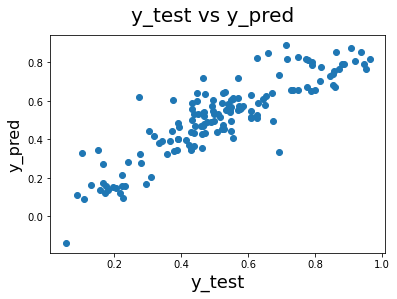

In [65]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0.5, 0, 'Errors')

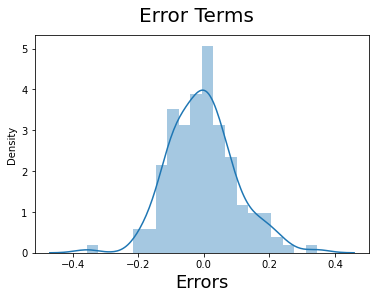

In [66]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_pred - y_test), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [67]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.10175220460305907

In [68]:
#Returns the mean squared error; we'll take a square root
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
219    0.495168
719    0.414289
3      0.177174
392    0.460308
360    0.131155
Name: cnt, Length: 146, dtype: float64

In [69]:
y_pred

184    0.336148
535    0.889143
299    0.445433
221    0.604127
152    0.613474
         ...   
219    0.602985
719    0.396234
3      0.159155
392    0.467955
360    0.165692
Length: 146, dtype: float64

In [70]:
R2 = r2_score(y_test, y_pred)
R2

0.7696941034873057

In [71]:
adj_R2 = 1-(1-R2)*(146-1)/(146-10-1)
adj_R2

0.7526344074493283